In [49]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.cluster.vq import kmeans

# Exemple

2024-12-02 13:49:43.471917: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


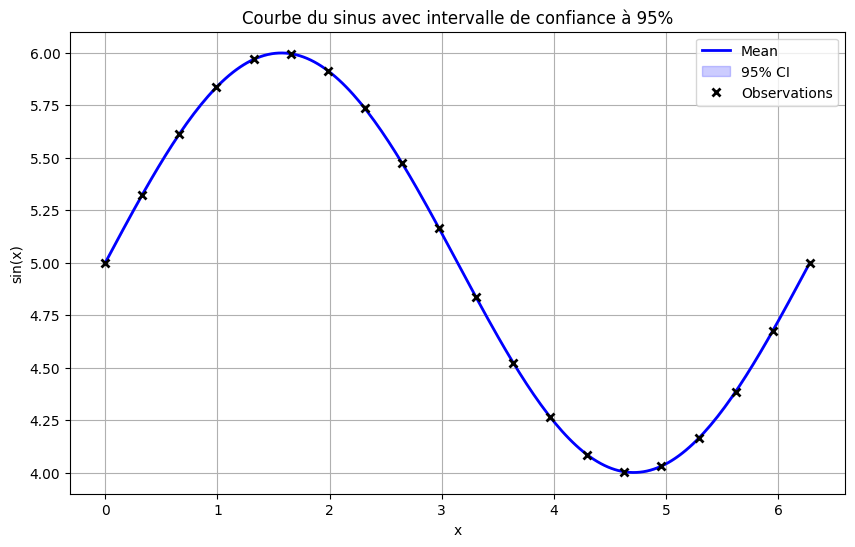

Temps d'entraînement: 0.6264841556549072 secondes
Temps de prédiction: 0.020572900772094727 secondes


In [3]:
# Données d'entrée (x) et de sortie (y)
R = 1
X = np.linspace(0, 2*np.pi*R, 20).reshape(-1, 1) 
Y = np.sin(X/R)+ 5  # Sinus avec du bruit

# Création du modèle de régression Gaussienne avec GPflow
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.GPR(data=(X, Y), kernel=k,noise_variance=2e-6)  # Modèle de régression

# Entraînement du modèle
start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time

# Prédiction avec intervalle de confiance à 95%
X_new = np.linspace(0, 2*np.pi*R, 200).reshape(-1, 1)
start_time = time.time()
mean, var = m.predict_f(X_new)  # Prédiction des moyennes et variances
prediction_time = time.time() - start_time

# Calcul de l'écart-type
std = np.sqrt(var)

# Tracé de la courbe avec barre d'erreurs (intervalle de confiance à 95%)
plt.figure(figsize=(10, 6))
plt.plot(X_new, mean, 'b', lw=2, label='Mean')  # Courbe des moyennes
plt.fill_between(X_new[:, 0], mean[:, 0] - 2*std[:, 0], mean[:, 0] + 2*std[:, 0], color='blue', alpha=0.2, label='95% CI')  # Barre d'erreurs
plt.plot(X, Y, 'kx', mew=2, label='Observations')  # Points d'observation
plt.title('Courbe du sinus avec intervalle de confiance à 95%')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()

print("Temps d'entraînement:", training_time, "secondes")
print("Temps de prédiction:", prediction_time, "secondes")

# Fonction pour plot

In [2]:
def plot_curves(x_train, y_train, std, X_test, mean):
    """Trace le processus gaussien et son incertitude à 95% (écart type)

    Args:
        x_train, y_train, de type quelconque mais pouvant être converti en np.array
        standard_deviation et mean qui sont l'écart type et la moyenne donné par le model
        n le nombre de points qu'on plot pour la courbe

    Returns:
        graphe du processus gaussien
    """
    plt.figure(figsize=(10, 6))
    # plot les points d'entraînement
    plt.plot(x_train, y_train, 'kx', mew=2, label='Observations')

    # Plot la courbe des moyennes
    plt.plot(X_test, mean, 'b', lw=2, label='Mean')  
    
    # Tracer les courbes limites en bleu clair
    plt.fill_between(X_test[:, 0], mean[:, 0] - 2*std[:, 0], mean[:, 0] + 2*std[:, 0], color='blue', alpha=0.2, label='95% CI') 

    # Ajouter une légende et des titres aux axes
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Training and Test Curves with Standard Deviation Interval')
    plt.grid(True)
    # Afficher le graphique
    plt.show()



# Main

2024-12-30 13:21:23.846365: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


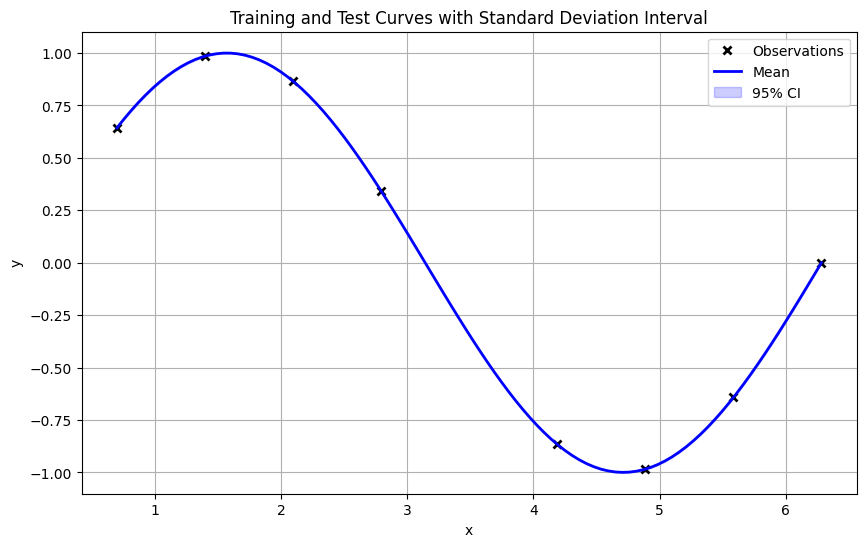

Temps d'entraînement: 3.6916980743408203 secondes
Temps de prédiction: 0.12696480751037598 secondes
La RMSE vaut: 0.010920674237840912


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_81548/2906533890.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


In [3]:
# ENTREES
X = np.linspace(0, 2*np.pi, 10).reshape(-1, 1) 
Y = np.sin(X)

# SEPARATIONS ENTRE DONNEES TRAIN ET DONNEES POUR LE CALCUL DE LA RMSE, n = le nombre de valeur pour le calcul de la RMSE
def separation(X, Y, n):
    pas = len(X) // (n - 1)
    X_rmse = []
    Y_rmse = []
    X_train = []
    Y_train = []
    for i in range(0, len(X), pas):
            X_rmse.append(X[i])
            Y_rmse.append(Y[i])
    X_rmse = np.vstack(X_rmse)
    Y_rmse = np.vstack(Y_rmse)
    for x, y in zip(X, Y):
        if not any(np.all(np.isclose(x, xi)) for xi in X_rmse):
            X_train.append(x)
            Y_train.append(y)

    X_rmse = np.vstack(X_rmse)
    Y_rmse = np.vstack(Y_rmse)
    X_train = np.array(X_train).reshape(-1, 1)
    Y_train = np.array(Y_train).reshape(-1, 1)
    
    return X_train, Y_train, X_rmse, Y_rmse

n = 3
X_train = separation(X,Y,n)[0]
Y_train = separation(X,Y,n)[1]
X_rmse = separation(X,Y,n)[2]
Y_rmse = separation(X,Y,n)[3]

# REGRESSION AVEC LES DONNEES TRAIN
# A MODIFIER EN FONCTION DE LA BIBLIO
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.GPR(data=(X_train, Y_train), kernel=k,noise_variance=2e-6)  # Modèle de régression

X_test = np.linspace(X_train[0], X_train[-1], 100).reshape(-1,1)
start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time
start_time = time.time()
mean, var = m.predict_f(X_test) 
prediction_time = time.time() - start_time
std = np.sqrt(var)

# PLOT COURBES
plot_curves(X_train,Y_train,std,X_test,mean)

# Calcul de la RMSE
def calc_rmse(X_rmse,Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    rmse = 0
    for i in range(len(Y_rmse)):
        rmse += (Y_rmse[i] - Y_pred[i])**2
    rmse = np.sqrt(rmse / len(X_rmse))
    return float(rmse)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("Temps de prédiction:", prediction_time, "secondes")
print("La RMSE vaut:", rmse)

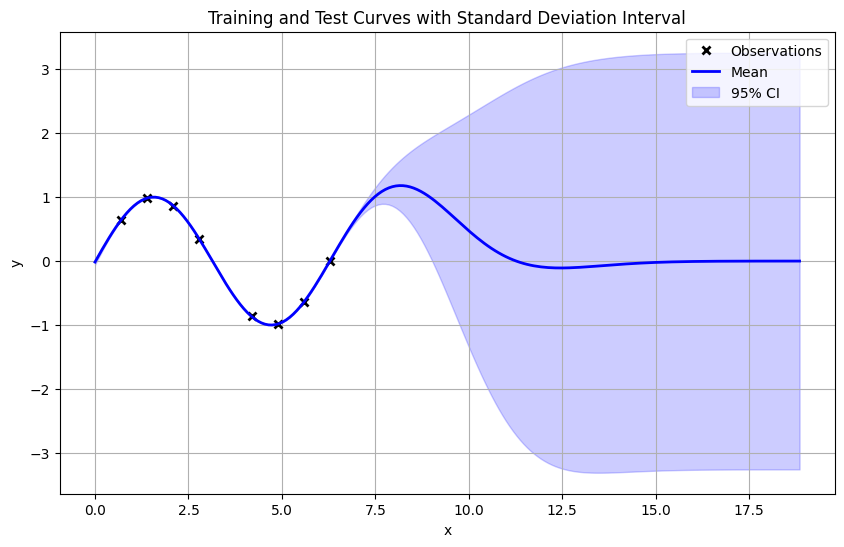

In [35]:
# Génération de X_test pour couvrir toute la plage des données
X_test = np.linspace(0, 6*np.pi, 200).reshape(-1, 1)

# Récupération des valeurs prédites et de l'écart-type pour X_test
mean, var = m.predict_f(X_test)
std = np.sqrt(var)

# PLOT COURBES
plot_curves(X_train, Y_train, std, X_test, mean)


## Avec des données réelles

In [29]:
from sklearn.datasets import fetch_openml

df = fetch_openml(data_id=41187, as_frame=True)
df.frame.head()

,year,month,day,weight,flag,station,co2
0,1958,3,29,4,0,MLO,316.1
1,1958,4,5,6,0,MLO,317.3
2,1958,4,12,4,0,MLO,317.6
3,1958,4,19,6,0,MLO,317.5
4,1958,4,26,2,0,MLO,316.4


In [30]:
import polars as pl

co2_data = pl.DataFrame(df.frame[["year", "month", "day", "co2"]]).select(
    pl.date("year", "month", "day"), "co2"
)
co2_data.head()

date,co2
date,f64
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [31]:
X = co2_data.select(
    pl.col("date").dt.year() + pl.col("date").dt.month() / 12
).to_numpy().reshape(-1,1)
Y = co2_data["co2"].to_numpy().reshape(-1,1)

In [32]:
print(len(X))

2225


In [33]:
# SEPARATIONS ENTRE DONNEES TRAIN ET DONNEES POUR LE CALCUL DE LA RMSE, n = le nombre de valeur pour le calcul de la RMSE
def separation(X, Y, n):
    pas = len(X) // (n - 1)
    X_rmse = []
    Y_rmse = []
    X_train = []
    Y_train = []
    for i in range(0, len(X), pas):
            X_rmse.append(X[i])
            Y_rmse.append(Y[i])
    X_rmse = np.vstack(X_rmse)
    Y_rmse = np.vstack(Y_rmse)
    for x, y in zip(X, Y):
        if not any(np.all(np.isclose(x, xi)) for xi in X_rmse):
            X_train.append(x)
            Y_train.append(y)

    X_rmse = np.vstack(X_rmse)
    Y_rmse = np.vstack(Y_rmse)
    X_train = np.array(X_train).reshape(-1, 1)
    Y_train = np.array(Y_train).reshape(-1, 1)
    
    return X_train, Y_train, X_rmse, Y_rmse

n = len(X)//10
X_train = separation(X,Y,n)[0]
Y_train = separation(X,Y,n)[1]
X_rmse = separation(X,Y,n)[2]
Y_rmse = separation(X,Y,n)[3]

#### GP

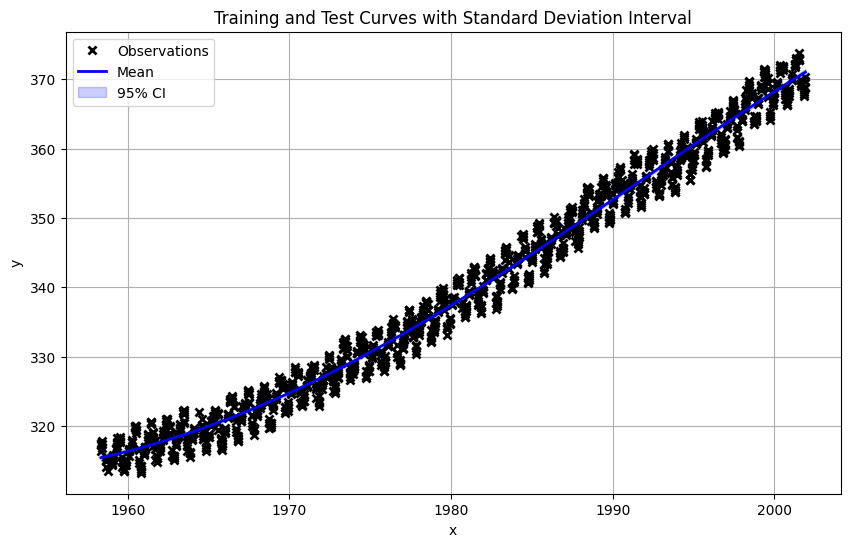

Temps d'entraînement: 71.25745606422424 secondes
Temps de prédiction: 0.3072059154510498 secondes
La RMSE vaut: 2.164884770586489


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_81548/2965899476.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


In [16]:
# REGRESSION AVEC LES DONNEES TRAIN
# A MODIFIER EN FONCTION DE LA BIBLIO
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.GPR(data=(X_train, Y_train), kernel=k,noise_variance=2e-6)  # Modèle de régression

X_test = np.linspace(X_train[0], X_train[-1], 100).reshape(-1,1)
start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time
start_time = time.time()
mean, var = m.predict_f(X_test) 
prediction_time = time.time() - start_time
std = np.sqrt(var)

# PLOT COURBES
plot_curves(X_train,Y_train,std,X_test,mean)

# Calcul de la RMSE
def calc_rmse(X_rmse,Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    rmse = 0
    for i in range(len(Y_rmse)):
        rmse += (Y_rmse[i] - Y_pred[i])**2
    rmse = np.sqrt(rmse / len(X_rmse))
    return float(rmse)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("Temps de prédiction:", prediction_time, "secondes")
print("La RMSE vaut:", rmse)

#### GP inducting point rng 10%

2024-12-30 14:02:54.527342: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


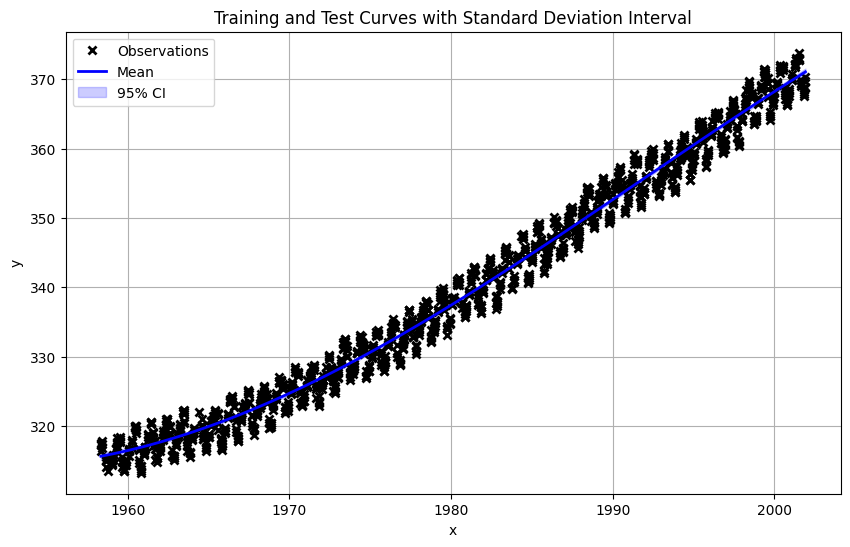

Temps d'entraînement: 4.089745044708252 secondes
Temps de prédiction: 0.062453269958496094 secondes
La RMSE vaut: 2.163734550111076


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_81548/2965899476.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


In [36]:
# REGRESSION AVEC LES DONNEES TRAIN
# A MODIFIER EN FONCTION DE LA BIBLIO
m = int(len(X_train)/10)
rng = np.random.default_rng(1234)
inducing_variable = rng.choice(X_train, size=m, replace=False)
# Création du modèle de régression Gaussienne avec GPflow
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
# Model
m = gpflow.models.SGPR(
    data=(X_train, Y_train),
    kernel=k,
    inducing_variable=inducing_variable
)

X_test = np.linspace(X_train[0], X_train[-1], 100).reshape(-1,1)
start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time
start_time = time.time()
mean, var = m.predict_f(X_test) 
prediction_time = time.time() - start_time
std = np.sqrt(var)

# PLOT COURBES
plot_curves(X_train,Y_train,std,X_test,mean)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("Temps de prédiction:", prediction_time, "secondes")
print("La RMSE vaut:", rmse)

#### GP inducting point rng 50%

2024-12-30 14:03:35.457172: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2024-12-30 14:03:36.225752: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2024-12-30 14:03:37.268241: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2024-12-30 14:03:37.889916: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


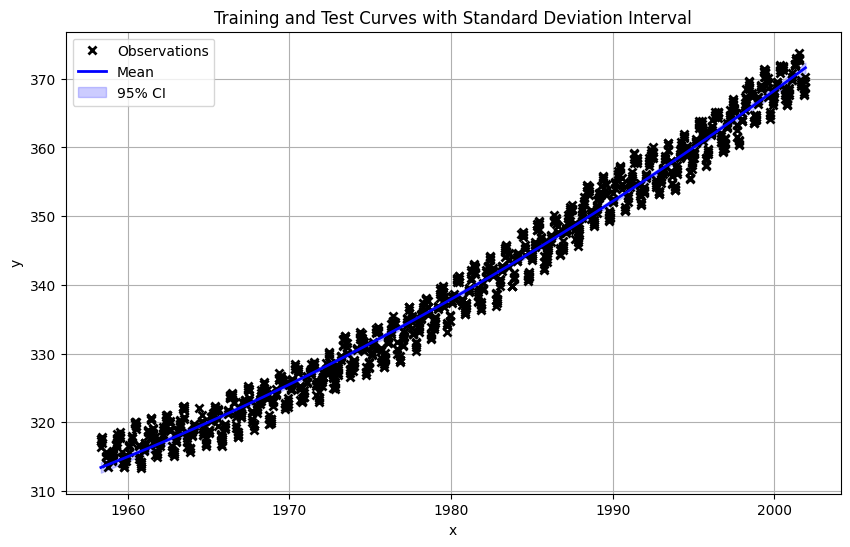

Temps d'entraînement: 37.87903833389282 secondes
Temps de prédiction: 0.32268786430358887 secondes
La RMSE vaut: 2.2503265644224033


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_81548/2965899476.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


In [37]:
# REGRESSION AVEC LES DONNEES TRAIN
# A MODIFIER EN FONCTION DE LA BIBLIO
m = int(len(X_train)/2)
rng = np.random.default_rng(1234)
inducing_variable = rng.choice(X_train, size=m, replace=False)
# Création du modèle de régression Gaussienne avec GPflow
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
# Model
m = gpflow.models.SGPR(
    data=(X_train, Y_train),
    kernel=k,
    inducing_variable=inducing_variable
)

X_test = np.linspace(X_train[0], X_train[-1], 100).reshape(-1,1)
start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time
start_time = time.time()
mean, var = m.predict_f(X_test) 
prediction_time = time.time() - start_time
std = np.sqrt(var)

# PLOT COURBES
plot_curves(X_train,Y_train,std,X_test,mean)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("Temps de prédiction:", prediction_time, "secondes")
print("La RMSE vaut:", rmse)

#### GP inducting point Kmean 10%

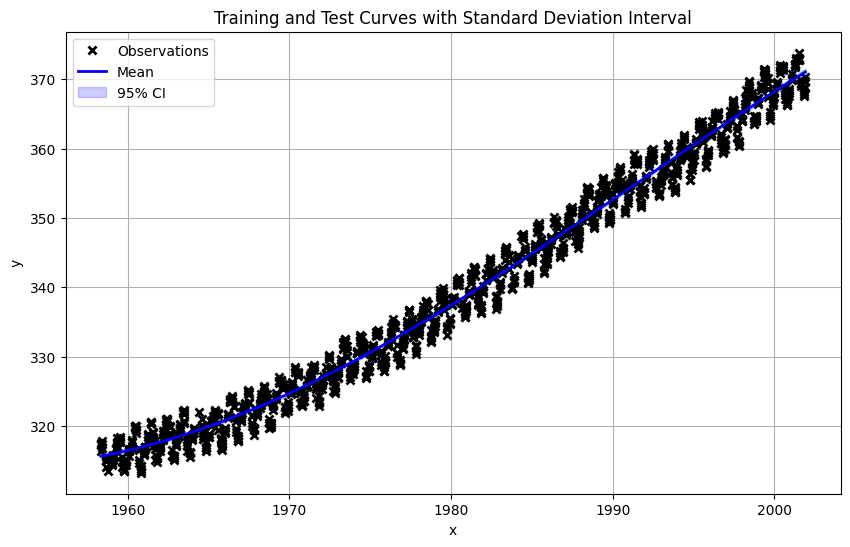

Temps d'entraînement: 3.9298009872436523 secondes
Temps de prédiction: 0.0640561580657959 secondes
La RMSE vaut: 2.1637269209581986


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_81548/2965899476.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


In [35]:
n_inducing = int(len(X_train)/10)
inducing_variable, _ = kmeans(X_train, n_inducing)
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.SGPR(data=(X_train, Y_train), kernel=k, inducing_variable=inducing_variable)  # Modèle de régression

X_test = np.linspace(X_train[0], X_train[-1], 100).reshape(-1,1)
start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time
start_time = time.time()
mean, var = m.predict_f(X_test) 
prediction_time = time.time() - start_time
std = np.sqrt(var)

# PLOT COURBES
plot_curves(X_train,Y_train,std,X_test,mean)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("Temps de prédiction:", prediction_time, "secondes")
print("La RMSE vaut:", rmse)

#### GP inducting point Kmean 50%

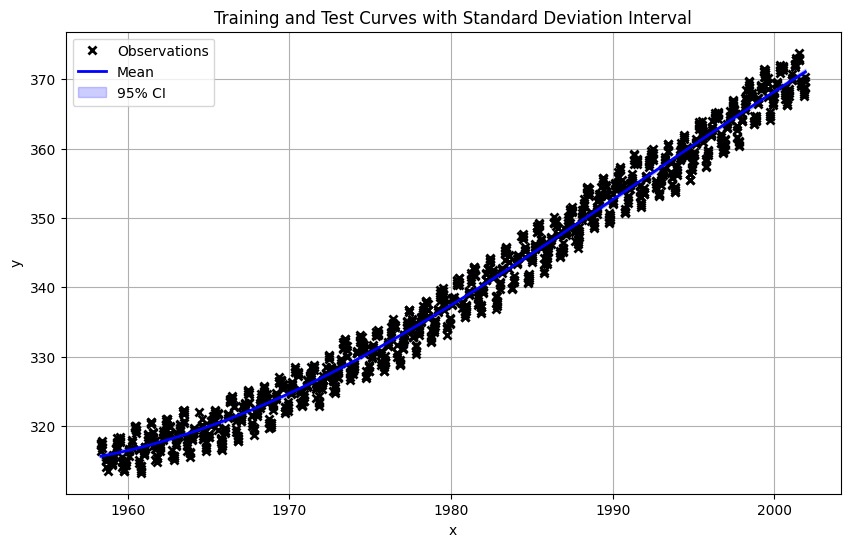

Temps d'entraînement: 7.921438932418823 secondes
Temps de prédiction: 0.09962701797485352 secondes
La RMSE vaut: 2.1637266609573107


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_81548/2965899476.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


In [38]:
n_inducing = int(len(X_train)/2)
inducing_variable, _ = kmeans(X_train, n_inducing)
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.SGPR(data=(X_train, Y_train), kernel=k, inducing_variable=inducing_variable)  # Modèle de régression

X_test = np.linspace(X_train[0], X_train[-1], 100).reshape(-1,1)
start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time
start_time = time.time()
mean, var = m.predict_f(X_test) 
prediction_time = time.time() - start_time
std = np.sqrt(var)

# PLOT COURBES
plot_curves(X_train,Y_train,std,X_test,mean)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("Temps de prédiction:", prediction_time, "secondes")
print("La RMSE vaut:", rmse)

# Prédire l'âge à partir de caractéristiques physiques

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
features = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [3]:
features

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [36]:
features = features.replace('M',0)
features = features.replace('F',1)
features = features[features['Sex'] != 'I']

In [37]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [38]:
X = features.values.tolist()
print(X)

[[0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15], [0, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07], [1, 0.53, 0.42, 0.135, 0.677, 0.2565, 0.1415, 0.21], [0, 0.44, 0.365, 0.125, 0.516, 0.2155, 0.114, 0.155], [1, 0.53, 0.415, 0.15, 0.7775, 0.237, 0.1415, 0.33], [1, 0.545, 0.425, 0.125, 0.768, 0.294, 0.1495, 0.26], [0, 0.475, 0.37, 0.125, 0.5095, 0.2165, 0.1125, 0.165], [1, 0.55, 0.44, 0.15, 0.8945, 0.3145, 0.151, 0.32], [1, 0.525, 0.38, 0.14, 0.6065, 0.194, 0.1475, 0.21], [0, 0.43, 0.35, 0.11, 0.406, 0.1675, 0.081, 0.135], [0, 0.49, 0.38, 0.135, 0.5415, 0.2175, 0.095, 0.19], [1, 0.535, 0.405, 0.145, 0.6845, 0.2725, 0.171, 0.205], [1, 0.47, 0.355, 0.1, 0.4755, 0.1675, 0.0805, 0.185], [0, 0.5, 0.4, 0.13, 0.6645, 0.258, 0.133, 0.24], [1, 0.44, 0.34, 0.1, 0.451, 0.188, 0.087, 0.13], [0, 0.365, 0.295, 0.08, 0.2555, 0.097, 0.043, 0.1], [0, 0.45, 0.32, 0.1, 0.381, 0.1705, 0.075, 0.115], [0, 0.355, 0.28, 0.095, 0.2455, 0.0955, 0.062, 0.075], [1, 0.565, 0.44, 0.155, 0.9395, 0.4275, 0.214

In [39]:
Y = y.values.tolist()
print(Y)

[[15], [7], [9], [10], [7], [8], [20], [16], [9], [19], [14], [10], [11], [10], [10], [12], [7], [10], [7], [9], [11], [10], [12], [9], [10], [11], [11], [12], [15], [11], [10], [15], [18], [19], [13], [8], [16], [8], [11], [9], [9], [14], [5], [5], [4], [7], [9], [7], [6], [9], [8], [7], [10], [10], [7], [8], [8], [8], [4], [7], [7], [9], [10], [7], [8], [8], [12], [13], [10], [6], [13], [8], [20], [11], [13], [15], [9], [10], [11], [14], [9], [12], [16], [21], [14], [12], [13], [10], [9], [12], [15], [12], [13], [10], [15], [14], [9], [8], [7], [10], [7], [15], [15], [10], [12], [12], [11], [10], [9], [9], [9], [9], [9], [9], [11], [11], [11], [10], [9], [8], [9], [7], [14], [6], [6], [5], [6], [8], [19], [18], [17], [9], [7], [7], [7], [8], [7], [9], [9], [9], [10], [10], [16], [11], [10], [10], [10], [9], [5], [4], [15], [9], [10], [10], [12], [10], [13], [16], [13], [13], [13], [13], [12], [18], [16], [14], [20], [20], [14], [12], [14], [7], [8], [8], [5], [7], [5], [8], [4], [11]

In [2]:
def separation(X, Y, n):
    pas = len(X) // (n - 1)
    X_rmse = []
    Y_rmse = []
    X_train = []
    Y_train = []
    for i in range(0, len(X), pas):
        X_rmse.append(X[i])
        Y_rmse.append(Y[i])
    for x, y in zip(X, Y):
        if not any(np.array_equal(x, xi) for xi in X_rmse):  
            X_train.append(x)
            Y_train.append(y)

    X_rmse = np.array(X_rmse)
    Y_rmse = np.array(Y_rmse)
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    
    return X_train, Y_train, X_rmse, Y_rmse


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [28]:
print(X_train)

[[-6.4192200e-01 -3.2585500e-01  2.0013200e-01 ... -1.3116692e+01
  -2.0005030e+00  1.8050713e+01]
 [-2.5196000e-02 -1.9931100e-01  1.1948700e-01 ... -6.0609820e+00
  -1.0164260e+00  1.2906386e+01]
 [-3.1174000e-01 -1.7772900e-01 -4.3970000e-02 ...  1.3397346e+01
   1.1711754e+01 -3.5154318e+01]
 ...
 [-4.7805600e-01 -4.7300700e-01  5.6059000e-02 ... -1.4433811e+01
  -3.9235850e+00  1.9343433e+01]
 [-3.1444200e-01 -2.5928400e-01  1.2819000e-01 ... -9.1432730e+00
  -1.4894660e+00  1.8648865e+01]
 [-4.9803700e-01 -3.6104100e-01  6.6457000e-02 ...  6.6812430e+00
   3.3457400e+00 -8.1814580e+00]]


In [45]:
X_float = [[float(value) for value in row] for row in X_train]

X_train = np.array(X_train)

print(X_train)

[[0.     0.35   0.265  ... 0.0995 0.0485 0.07  ]
 [0.     0.44   0.365  ... 0.2155 0.114  0.155 ]
 [1.     0.545  0.425  ... 0.294  0.1495 0.26  ]
 ...
 [0.     0.56   0.43   ... 0.4    0.172  0.229 ]
 [0.     0.59   0.44   ... 0.439  0.2145 0.2605]
 [1.     0.625  0.485  ... 0.531  0.261  0.296 ]]


In [48]:
Y_train = Y_train.astype(np.float64)
print(Y_train)

[[ 7.]
 [10.]
 [ 8.]
 ...
 [ 7.]
 [ 7.]
 [ 9.]]


In [64]:
# REGRESSION AVEC LES DONNEES TRAIN
# A MODIFIER EN FONCTION DE LA BIBLIO
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.GPR(data=(X_train, Y_train), kernel=k,noise_variance=2e-6)  # Modèle de régression

start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time


# PLOT COURBES
#plot_curves(X_train,Y_train,std,X_test,mean)

# Calcul de la RMSE
def calc_rmse(X_rmse,Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    rmse = 0
    for i in range(len(Y_rmse)):
        rmse += (Y_rmse[i] - Y_pred[i])**2
    rmse = np.sqrt(rmse / len(X_rmse))
    return float(rmse)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("La RMSE vaut:", rmse)

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [9,21], In[1]: [1,223] [Op:MatMul]

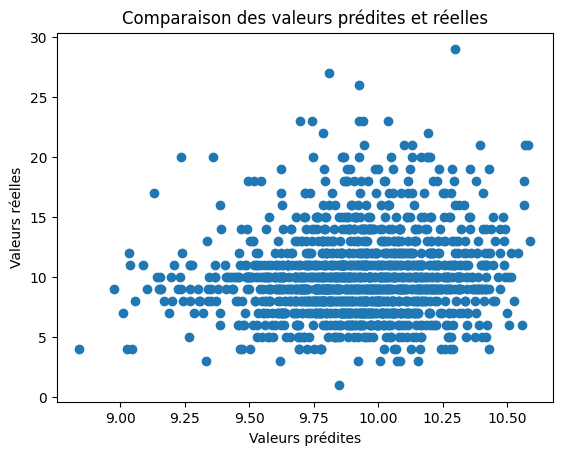

In [54]:
def plot(X_rmse, Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    plt.scatter(Y_pred, Y_rmse)
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Comparaison des valeurs prédites et réelles')
    plt.show()

plot(X_rmse, Y_rmse)

## Sarcos

In [106]:
df = pd.read_csv('sarcos_inventory.csv')

In [107]:
df

,0.019478,-0.134218,0.027439,1.516401,0.300936,0.058259,0.150134,-0.266791,-0.237134,-0.091272,1.549958,-0.006883,0.012774,-1.930253,13.439378,-8.935911,14.242047,13.52024,11.695956,1.210212,-22.119289,50.292652
0,0.017279,-0.137077,0.026999,1.532517,0.301344,0.058259,0.128653,-0.153640,-0.335279,0.006449,1.670677,0.085485,0.017012,-2.211089,11.989628,-7.781117,11.613101,9.550076,14.643369,1.015070,-17.048688,44.104164
1,0.016336,-0.140878,0.027250,1.549670,0.302318,0.059027,0.104104,-0.047313,-0.418732,0.106274,1.721737,0.326621,0.015857,-2.337160,9.961797,-5.468357,9.550884,5.933340,15.467628,0.910548,-11.415526,37.354858
2,0.016273,-0.145307,0.029072,1.566855,0.307628,0.059027,0.080321,0.053238,-0.460963,0.188013,1.740283,0.579685,0.007958,-2.331961,7.332938,-2.434889,7.664916,3.964112,10.309203,0.921360,-5.772058,30.676065
3,0.017279,-0.150051,0.031083,1.584416,0.314162,0.059027,0.058840,0.133810,-0.462264,0.263975,1.770296,0.608002,-0.001271,-2.249311,3.797804,0.467865,6.160604,3.175643,2.868096,1.059957,-0.491542,25.920128
4,0.018818,-0.154544,0.034256,1.602449,0.319723,0.058259,0.036592,0.140750,-0.435916,0.318977,1.787951,0.508278,-0.006587,-2.123942,0.373019,2.622800,4.442314,2.821629,-1.571357,1.306848,4.210767,17.594261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44478,-0.566154,-0.458964,0.082782,1.882004,0.542867,-0.342335,0.121680,0.511096,0.518305,-0.172346,-1.090276,-1.246035,0.141139,0.567568,17.067898,13.789789,-7.002850,-25.837529,-28.150783,6.508562,16.682488,33.709671
44479,-0.559493,-0.452775,0.079986,1.869815,0.528541,-0.341567,0.130119,0.695035,0.664753,-0.237233,-1.324459,-1.333566,0.254777,0.741228,16.347257,13.157214,-6.667653,-25.374709,-19.382864,7.637496,16.850623,36.020412
44480,-0.551577,-0.445141,0.077410,1.854546,0.515630,-0.337732,0.137791,0.855033,0.801974,-0.281012,-1.599388,-1.371109,0.392815,0.917893,14.469228,11.607586,-7.070009,-24.337621,-15.737381,8.392247,16.851494,22.699657
44481,-0.541838,-0.436124,0.074300,1.836482,0.500550,-0.333896,0.146997,1.009577,0.912848,-0.368339,-1.861260,-1.574920,0.546730,1.135569,11.281890,9.391568,-7.454019,-22.015909,-13.685472,8.715152,16.502180,17.126688


In [109]:
Y = df[' 50.292652'].values
Y = np.array([[valeur] for valeur in Y])[:2500]

In [110]:
df.columns

Index(['0.019478', ' -0.134218', ' 0.027439', ' 1.516401', ' 0.300936',
       ' 0.058259', ' 0.150134', ' -0.266791', ' -0.237134', ' -0.091272',
       ' 1.549958', ' -0.006883', ' 0.012774', ' -1.930253', ' 13.439378',
       ' -8.935911', ' 14.242047', ' 13.52024', ' 11.695956', ' 1.210212',
       ' -22.119289', ' 50.292652'],
      dtype='object')

In [112]:
X =df[['0.019478', ' -0.134218', ' 0.027439', ' 1.516401', ' 0.300936',
       ' 0.058259', ' 0.150134', ' -0.266791', ' -0.237134', ' -0.091272',
       ' 1.549958', ' -0.006883', ' 0.012774', ' -1.930253', ' 13.439378',
       ' -8.935911', ' 14.242047', ' 13.52024', ' 11.695956', ' 1.210212',
       ' -22.119289']].values
X = np.array(X)[:2500]

In [113]:
X_train, X_rmse, Y_train, Y_rmse = train_test_split(X, Y, test_size=0.1, random_state=1)

In [114]:
# Calcul de la RMSE
def calc_rmse(X_rmse,Y_rmse):
    Y_pred,_ = m.predict_f(X_rmse)
    rmse = 0
    for i in range(len(Y_rmse)):
        rmse += (Y_rmse[i] - Y_pred[i])**2
    rmse = np.sqrt(rmse / len(X_rmse))
    return float(rmse)

#### GP

In [117]:
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.GPR(data=(X_train, Y_train), kernel=k)  # Modèle de régression

start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time
start_time = time.time()
mean, var = m.predict_f(X_test) 
prediction_time = time.time() - start_time
std = np.sqrt(var)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("Temps de prédiction:", prediction_time, "secondes")
print("La RMSE vaut:", rmse)

Temps d'entraînement: 312.8332118988037 secondes
Temps de prédiction: 0.9034430980682373 secondes
La RMSE vaut: 2.4711797192575897


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_81548/3946737402.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


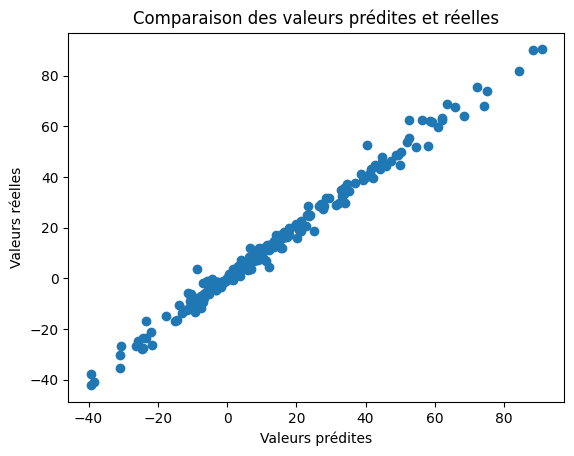

In [119]:
def plot(X_rmse, Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    plt.scatter(Y_pred, Y_rmse)
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Comparaison des valeurs prédites et réelles')
    plt.show()
    
plot(X_rmse, Y_rmse)

#### Kmean 10%

In [115]:
n_inducing = int(len(X_train)/10)
inducing_variable, _ = kmeans(X_train, n_inducing)
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.SGPR(data=(X_train, Y_train), kernel=k, inducing_variable=inducing_variable)  # Modèle de régression

start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time
start_time = time.time()
mean, var = m.predict_f(X_test) 
prediction_time = time.time() - start_time
std = np.sqrt(var)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("Temps de prédiction:", prediction_time, "secondes")
print("La RMSE vaut:", rmse)

Temps d'entraînement: 1603.6194269657135 secondes
Temps de prédiction: 0.11052203178405762 secondes
La RMSE vaut: 2.926379105846839


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_81548/3946737402.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


#### RNG 10%

In [120]:
m = int(len(X_train)/10)
rng = np.random.default_rng(1234)
inducing_variable = rng.choice(X_train, size=m, replace=False)
# Création du modèle de régression Gaussienne avec GPflow
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
# Model
m = gpflow.models.SGPR(
    data=(X_train, Y_train),
    kernel=k,
    inducing_variable=inducing_variable
)

start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time
start_time = time.time()
mean, var = m.predict_f(X_test) 
prediction_time = time.time() - start_time
std = np.sqrt(var)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("Temps de prédiction:", prediction_time, "secondes")
print("La RMSE vaut:", rmse)

Temps d'entraînement: 1582.1070148944855 secondes
Temps de prédiction: 0.11540007591247559 secondes
La RMSE vaut: 2.9169962840709185


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_81548/3946737402.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


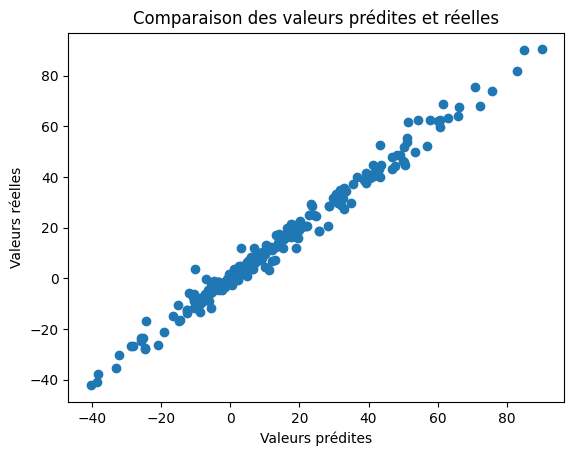

In [121]:
def plot(X_rmse, Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    plt.scatter(Y_pred, Y_rmse)
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Comparaison des valeurs prédites et réelles')
    plt.show()

plot(X_rmse, Y_rmse)

## Diamond

In [4]:
df = pd.read_csv('diamonds_dataset.csv')

In [5]:
df

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df = df.replace({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})
df = df.replace({'D': 6,'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0})
df = df.replace({'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7})

df

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


In [13]:
Y = df['price'].values[:10000]
Y = np.array([[valeur] for valeur in Y])

In [14]:
print(Y)

[[ 326]
 [ 326]
 [ 327]
 ...
 [4704]
 [4704]
 [4704]]


In [15]:
df.columns

Index(['rownames', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [17]:
X = np.array(df[[ 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']].values)[:10000]
print(X)

[[0.23 4.   5.   ... 3.95 3.98 2.43]
 [0.21 3.   5.   ... 3.89 3.84 2.31]
 [0.23 1.   5.   ... 4.05 4.07 2.31]
 ...
 [1.   3.   5.   ... 6.48 6.44 3.95]
 [1.   3.   6.   ... 6.41 6.29 3.94]
 [1.   0.   6.   ... 6.2  6.13 4.  ]]


In [20]:
def separation(X, Y, n):
    pas = len(X) // (n - 1)
    X_rmse = []
    Y_rmse = []
    X_train = []
    Y_train = []
    for i in range(0, len(X), pas):
        X_rmse.append(X[i])
        Y_rmse.append(Y[i])
    for x, y in zip(X, Y):
        if not any(np.array_equal(x, xi) for xi in X_rmse):  
            X_train.append(x)
            Y_train.append(y)

    X_rmse = np.array(X_rmse)
    Y_rmse = np.array(Y_rmse)
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    
    return X_train, Y_train, X_rmse, Y_rmse


X_train, Y_train, X_rmse, Y_rmse = separation(X, Y, 2000)

In [21]:
X_train = np.array(X_train, dtype=np.float64)
Y_train = np.array(Y_train, dtype=np.float64)
X_rmse = np.array(X_rmse, dtype=np.float64)
Y_rmse = np.array(Y_rmse, dtype=np.float64)

In [22]:
# REGRESSION AVEC LES DONNEES TRAIN
# A MODIFIER EN FONCTION DE LA BIBLIO
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.GPR(data=(X_train, Y_train), kernel=k,noise_variance=2e-6)  # Modèle de régression

start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time


# PLOT COURBES
#plot_curves(X_train,Y_train,std,X_test,mean)

# Calcul de la RMSE
def calc_rmse(X_rmse,Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    rmse = 0
    for i in range(len(Y_rmse)):
        rmse += (Y_rmse[i] - Y_pred[i])**2
    rmse = np.sqrt(rmse / len(X_rmse))
    return float(rmse)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("La RMSE vaut:", rmse)

2024-06-06 14:14:47.513688: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Temps d'entraînement: 7084.820285320282 secondes
La RMSE vaut: 303.6175593813321


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_43522/746190032.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


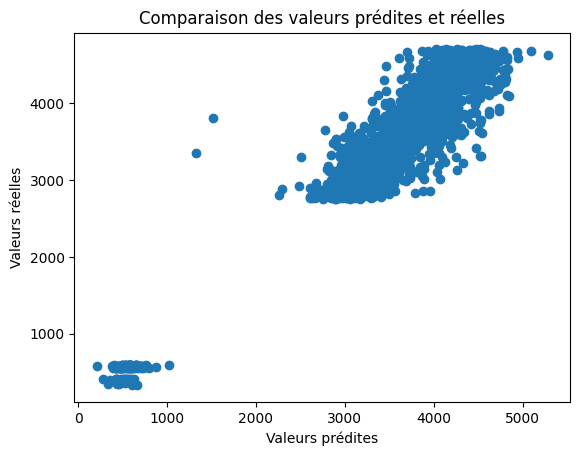

In [23]:
def plot(X_rmse, Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    plt.scatter(Y_pred, Y_rmse)
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Comparaison des valeurs prédites et réelles')
    plt.show()

plot(X_rmse, Y_rmse)

## SINUS

In [2]:
X = np.linspace((0,0),(5000,3000),15000)
print(X)
Y = np.sin(X[:, 0] + X[:, 1]).reshape(-1,1)
print(Y)

[[0.00000000e+00 0.00000000e+00]
 [3.33355557e-01 2.00013334e-01]
 [6.66711114e-01 4.00026668e-01]
 ...
 [4.99933329e+03 2.99959997e+03]
 [4.99966664e+03 2.99979999e+03]
 [5.00000000e+03 3.00000000e+03]]
[[0.        ]
 [0.50843717]
 [0.87562957]
 ...
 [0.42446069]
 [0.8258653 ]
 [0.99784303]]


In [3]:
def separation(X, Y, n):
    pas = len(X) // (n - 1)
    X_rmse = []
    Y_rmse = []
    X_train = []
    Y_train = []
    for i in range(0, len(X), pas):
        X_rmse.append(X[i])
        Y_rmse.append(Y[i])
    for x, y in zip(X, Y):
        if not any(np.array_equal(x, xi) for xi in X_rmse):  
            X_train.append(x)
            Y_train.append(y)

    X_rmse = np.array(X_rmse)
    Y_rmse = np.array(Y_rmse)
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    
    return X_train, Y_train, X_rmse, Y_rmse


X_train, Y_train, X_rmse, Y_rmse = separation(X, Y, 2000)

In [4]:
X_train = np.array(X_train, dtype=np.float64)
Y_train = np.array(Y_train, dtype=np.float64)
X_rmse = np.array(X_rmse, dtype=np.float64)
Y_rmse = np.array(Y_rmse, dtype=np.float64)

In [5]:
# REGRESSION AVEC LES DONNEES TRAIN
# A MODIFIER EN FONCTION DE LA BIBLIO
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.GPR(data=(X_train, Y_train), kernel=k,noise_variance=2e-6)  # Modèle de régression

start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time


# PLOT COURBES
#plot_curves(X_train,Y_train,std,X_test,mean)

# Calcul de la RMSE
def calc_rmse(X_rmse,Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    rmse = 0
    for i in range(len(Y_rmse)):
        rmse += (Y_rmse[i] - Y_pred[i])**2
    rmse = np.sqrt(rmse / len(X_rmse))
    return float(rmse)

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("La RMSE vaut:", rmse)

2024-06-09 18:31:55.745640: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Temps d'entraînement: 12156.550439834595 secondes
La RMSE vaut: 5.81197759442873e-05


/var/folders/bb/wvp2v08s5rbb1h_lfmvz2xnr0000gn/T/ipykernel_58251/746190032.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


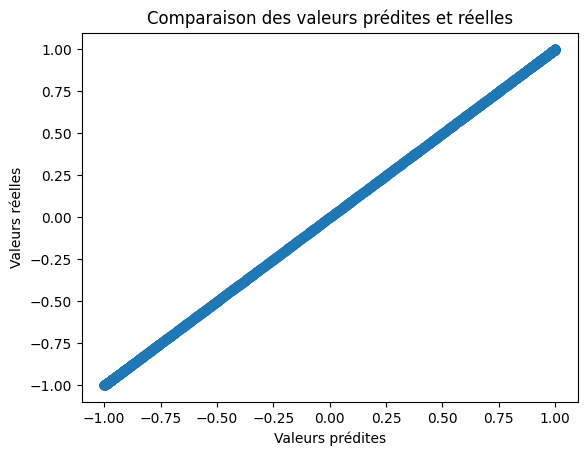

In [6]:
def plot(X_rmse, Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    plt.scatter(Y_pred, Y_rmse)
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Comparaison des valeurs prédites et réelles')
    plt.show()

plot(X_rmse, Y_rmse)